# Trabalho 5 - Transformada de Hough

Faça um documento jupyter notebook que forneça, com base na transformada de Hough modelada para círculos, a contagem e a descrição (coordenadas dos centros e raio) dos discos grandes presentes na imagem do exemplo (do trabalho 3 - segmentação dos discos claros usando a transformada top-hat). 

-------

Procedimento sugerido:

Use como base o resultado do trabalho 3. Inicialmente, subtraia o resultado do trabalho 3 da imagem original a fim de obter a segmentação dos discos. Em seguida, utilize um filtro para obter as bordas dos discos e binarize o resultado. Por fim, empregue a transformada de Hough para obter as informações desejadas.

-------

In [1]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# Funções

In [2]:
def img_threshold(img, threshold = 60):
    return threshold < img

In [3]:
def img2binary(img):
    """Binarization of image with threshold given"""
    img[img > 0] = 1
    return img

In [4]:
def sobel(img):
    sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    gx = cv.convertScaleAbs(cv.filter2D(img, cv.CV_64F, cv.flip(sobelx, -1)))
    gy = cv.convertScaleAbs(cv.filter2D(img, cv.CV_64F, cv.flip(sobely, -1)))
    
    return gx + gy

In [5]:
def plota(img, save = False, name = ''):
    num = len(img)
    fig = plt.figure(figsize = (15, 9))
    grid = plt.GridSpec(1, num, fig)
    
    for i in range(num):
        ax = fig.add_subplot(grid[0, i])
        ax.imshow(img[i], cmap = 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
    
    if save:
        plt.savefig(name)
        
    return fig

### Estratégia:

    1) Limiariza a entrada e a saída;
    2) Passar filtro mediano na entrada e na saída limiarizados;
    3) Fazer a diferença entra entrada e saída;
    4) Aplicar Sobel na diferença;

## Carregando as images

In [6]:
entrada = cv.imread('../images/cosmos_original.jpg', 0)
saida = cv.imread('../images/img_final.jpg', 0)

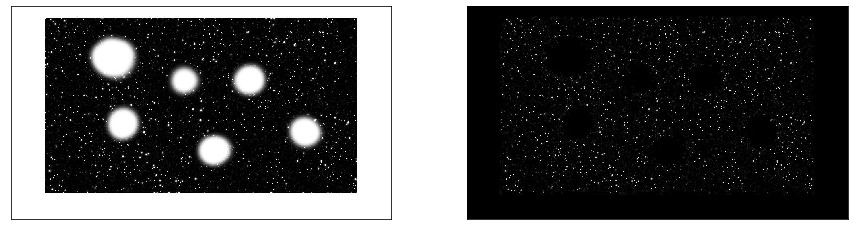

In [7]:
fig = plota([entrada, saida])

In [8]:
entrada_thres = img_threshold(entrada).astype(np.uint8)
saida_thres = img_threshold(saida).astype(np.uint8)

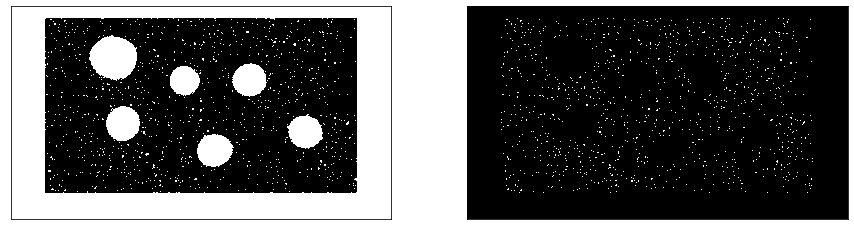

In [9]:
fig = plota([entrada_thres, saida_thres])

In [10]:
entrada_thres_med = cv.medianBlur(entrada_thres, 5)
saida_thres_med = cv.medianBlur(saida_thres, 5)

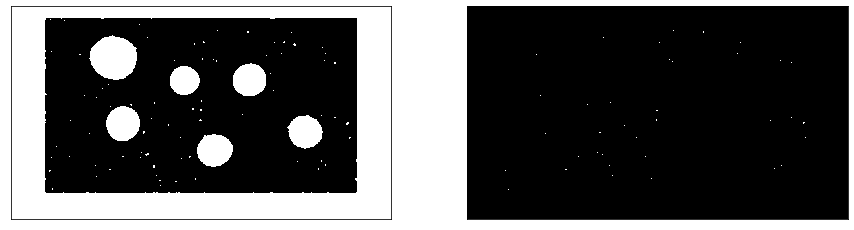

In [11]:
fig = plota([entrada_thres_med, saida_thres_med])

In [12]:
diff_thres_med = entrada_thres_med - saida_thres_med

In [13]:
diff_sob = sobel(diff_thres_med)

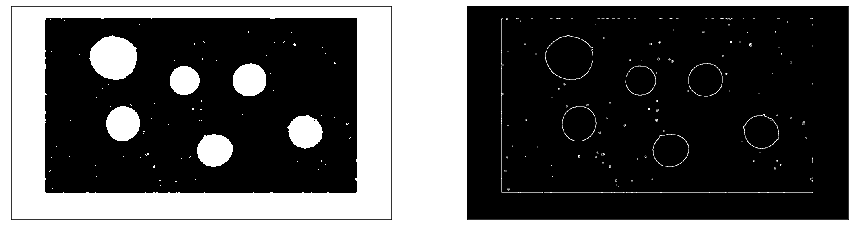

In [14]:
fig = plota([diff_thres_med, diff_sob])

In [15]:
diff_sob_bin = img2binary(np.copy(diff_sob))

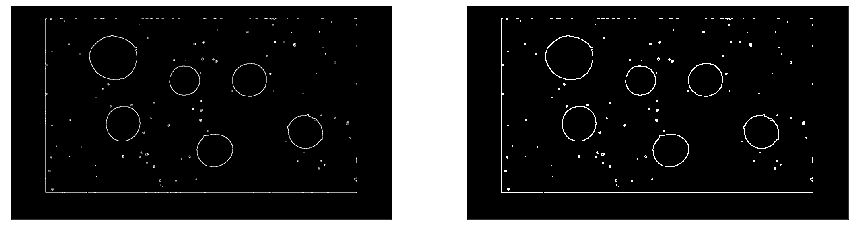

In [16]:
fig = plota([diff_sob, diff_sob_bin])

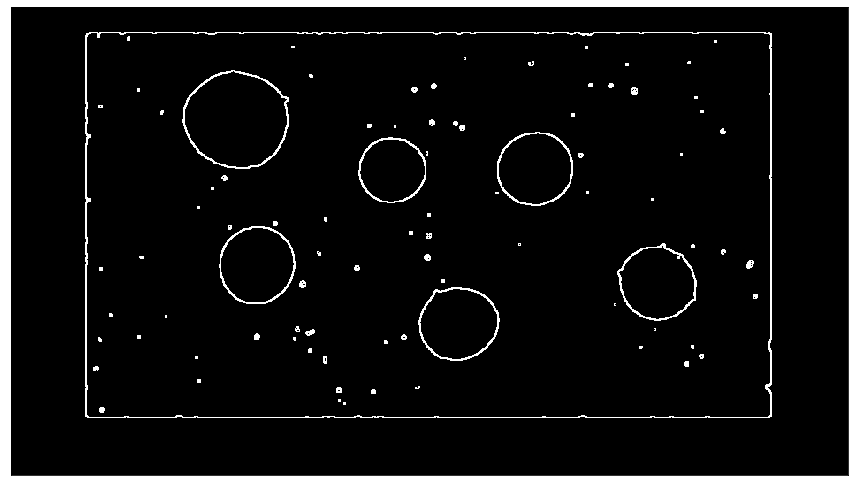

In [17]:
fig = plota([diff_sob_bin], save = True, name = '../images/diff_sob_bin.png')

In [18]:
n_rows, n_cols = diff_sob_bin.shape

In [19]:
from collections import defaultdict

In [72]:
steps = 101
points = []

In [73]:
r_min = 25
r_max = np.ceil(0.5 * np.sqrt(n_cols**2 + n_rows**2)).astype(np.int)

In [74]:
for rr in range(r_min, r_max + 1):
    for t in range(steps):
        points.append((rr, int(rr * np.cos(2 * np.pi * t / steps)), int(rr * np.sin(2 * np.pi * t / steps))))

In [75]:
len(points)

52419

In [76]:
xyr = np.zeros([n_rows + 1, n_cols + 1, r_max + 1])
acc = defaultdict(int)

In [77]:
for cx in np.arange(n_rows):
    for cy in np.arange(n_cols):
        if diff_sob_bin[cx, cy] > 0:    
            for r, x, y in points:
                if ((x + cx) > n_rows) or ((x + cx) < 0): continue
                if ((y + cy) > n_cols) or ((y + cy) < 0): continue
                xyr[x + cx, y + cy, r] += 1
                acc[(x + cx, y + cy, r)] += 1

KeyboardInterrupt: 

fig = plt.figure(figsize=(10,10))
plt.imshow(xyr.sum(axis=2))
plt.colorbar()